<a href="https://colab.research.google.com/github/nsandlin1/EEG_Mining/blob/main/EEG_Mining_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link to data files: https://bbci.de/competition/iii/#data_set_v

# Setting up data files

### Refactor from ascii (.asc) to csv (.csv)

```
perl -i -pe 's/(?<=\d)   (?=\d)/,/g' train*
perl -i -pe 's/^   //g' train*

perl -i -pe 's/(?<=\d)  (?=\d)/,/g' test*
perl -i -pe 's/^  //g' test*

for FILENAME in *.asc; do mv "$FILENAME" "${FILENAME%.asc}"; done
for FILENAME in *; do mv "$FILENAME" "${FILENAME}.csv"; done
```

### Import files

In [2]:
# upload files
from google.colab import files
uploaded = files.upload()

Saving test_subject1_psd04.csv to test_subject1_psd04.csv
Saving train_subject1_psd01.csv to train_subject1_psd01 (1).csv
Saving train_subject1_psd02.csv to train_subject1_psd02.csv
Saving train_subject1_psd03.csv to train_subject1_psd03.csv


In [10]:
# import files to pd dataframe
import pandas as pd
train_subject1_psd01 = pd.read_csv('train_subject1_psd01.csv', header=None)
train_subject1_psd02 = pd.read_csv('train_subject1_psd02.csv', header=None)
train_subject1_psd03 = pd.read_csv('train_subject1_psd03.csv', header=None)
train_subject1 = pd.concat([train_subject1_psd01, train_subject1_psd02, train_subject1_psd03])
# train_subject2_psd01 = pd.read_csv('train_subject2_psd01.csv', header=None)
# train_subject2_psd02 = pd.read_csv('train_subject2_psd02.csv', header=None)
# train_subject2_psd03 = pd.read_csv('train_subject2_psd03.csv', header=None)
# train_subject3_psd01 = pd.read_csv('train_subject3_psd01.csv', header=None)
# train_subject3_psd02 = pd.read_csv('train_subject3_psd02.csv', header=None)
# train_subject3_psd03 = pd.read_csv('train_subject3_psd03.csv', header=None)

# Data Visualization

<Axes: >

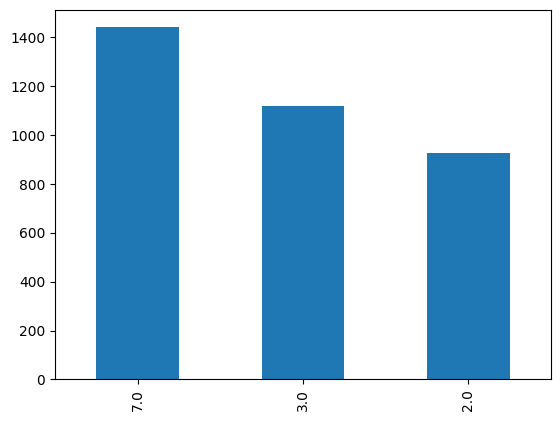

In [ ]:
# view occurance of different actions
# actions are specified by column 97
train_subject1_psd01[96].value_counts().plot(kind='bar')

<Axes: xlabel='0'>

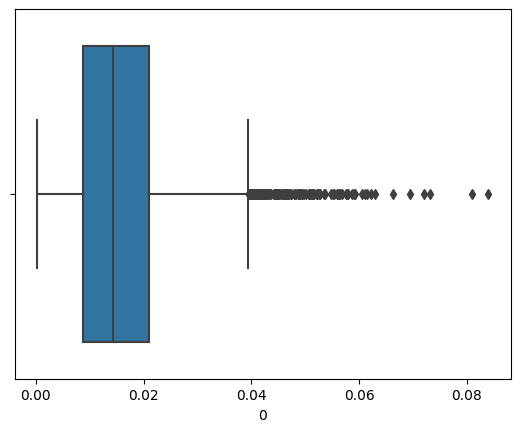

In [ ]:
import seaborn as sns
sns.boxplot(data=train_subject1_psd01, x=0)

# Preprocessing

In [ ]:
# function for checking nulls in df
def check_for_nulls(df, verbose=False):
  nulls = df.isnull().sum()

  if verbose:
    zeros = {}
    for key,value in nulls.items():
        zeros[key] = value
    return zeros
  else:
    return nulls

In [ ]:
check_for_nulls(train_subject1_psd01)

0     0
1     0
2     0
3     0
4     0
     ..
92    0
93    0
94    0
95    0
96    0
Length: 97, dtype: int64

### Analysis of Multicolinearity

In [ ]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor

# dataframe for independent variables
independents = train_subject1_psd01[[i for i in range(0, 96)]]

# VIF dataframe
vifs = pd.DataFrame()
vifs["attribute"] = independents.columns

# calculate VIF for each attribute
vifs["VIF"] = [variance_inflation_factor(independents.values, i) for i in range(len(independents.columns))]

print(vifs[vifs.VIF < 6])
print(vifs[vifs.VIF > 15])

    attribute       VIF
0           0  5.502826
11         11  5.828397
23         23  5.756342
35         35  5.946383
95         95  5.186868
    attribute        VIF
25         25  20.390979


# Data Mining



### Random Forest

acc: 0.9441260744985673


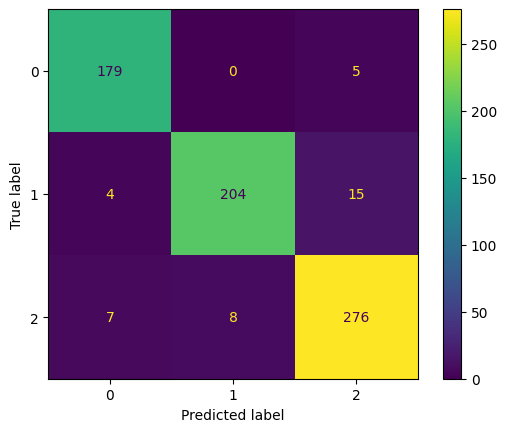

In [15]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# define independent and dependent variable subsets for training
independents = train_subject1_psd01.drop(96, axis=1)
dependents = train_subject1_psd01[96]

# partition training and testing sets
ind_train, ind_test, dep_train, dep_test = train_test_split(independents, dependents, test_size=0.2)

# fit the random forest model
##### TODO: Hyperparameter tuning
rf = RandomForestClassifier()
rf.fit(ind_train, dep_train)

# inference
dep_pred = rf.predict(ind_test)

# compute accuracy
acc = accuracy_score(dep_test, dep_pred)
print(f"acc: {acc}")

# print confusion matrix
cm = confusion_matrix(dep_test, dep_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


### SVM

In [ ]:
# https://holypython.com/svm/support-vector-machine-step-by-step/#google_vignette